
## Warp Shell \- Comoving
### Metric Creation

In [1]:
%%
width = 800;
height = 700;

figSize1 = [150,150,width,height];
figSize2 = [150,150,width,height/2];
figSize6 = [150,150,width,1.7*height];
textSize = 12;

%% Shell Metric
spaceScale = 5;
timeScale = 1;
tryGPU = 0;
centered = 1;
cartoonThickness = 5;

R1 = 10;
Rbuff = 0;
R2 = 20;

if centered == 1
    gridSize = ceil([1,2*(R2+10)*spaceScale,2*(R2+10)*spaceScale,cartoonThickness]);
else
    gridSize = ceil([1,(R2+10)*spaceScale,(R2+10)*spaceScale,cartoonThickness]);
end

factor = 1/3;
m = R2/(2*G)*c^2*factor;

vWarp = 0.02; % in betas

sigma = 0;
doWarp = 1;

gridScaling = [1/(timeScale*spaceScale*((vWarp)*c+1)),1/spaceScale,1/spaceScale,1/spaceScale];
gridScaling(1) = 1/(1000*c);
if centered == 1
    worldCenter = [(cartoonThickness+1)/2,(2*(R2+10)*spaceScale+1)/2,(2*(R2+10)*spaceScale+1)/2,(cartoonThickness+1)/2].*gridScaling;
else
    worldCenter = [(cartoonThickness+1)/2,5,5,(cartoonThickness+1)/2].*gridScaling;
end

if centered == 1
    x = linspace(0,2*(R2+10),gridSize(2)-4)';
    y = linspace(0,2*(R2+10),gridSize(3)-4)';
else
    x = linspace(0,(R2+10),gridSize(2)-4)';
    y = linspace(0,(R2+10),gridSize(3)-4)';
end

[X,Y] = meshgrid(x,y);

if centered == 1
    xlimit = [0 2*(R2+10)];
else
    xlimit = [0 (R2+10)];
end

smoothFactor = 400;

[Metric_ConstantWarp] = metricGet_WarpShellComoving(gridSize,worldCenter,m,R1,R2,Rbuff,sigma,smoothFactor,vWarp,doWarp,gridScaling);


wbh = -1.3944


In [3]:
size(Metric_ConstantWarp.tensor{1,1})

ans =

     1   300   300     5



### Energy Tensor and Energy Condition Evaluation

In [2]:
ConstantWarp = evalMetric(Metric_ConstantWarp,1,1);


### Plotting
#### Metric

error: conversion of nan to int64_t value failed
error: called from
    redblue at line 27 column 13


Inline plot failed, consider trying another graphics toolkit
           line 0: *All* edges undefined or out of range, thus no plot.

error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



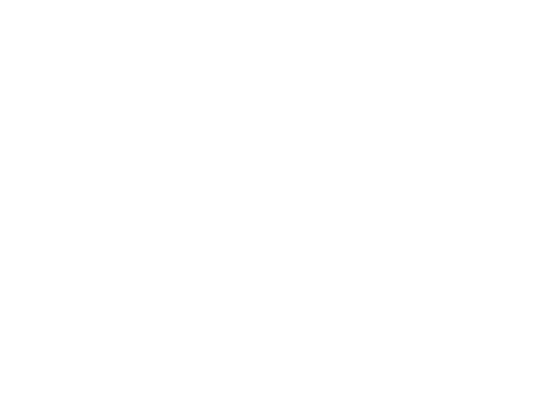

In [3]:

zOffset = 0;
figure('Position',figSize6)
tensorNames = ["g_{00}", "g_{01}", "g_{02}", "g_{03}"; "","g_{11}","g_{12}","g_{13}"; "","","g_{22}","g_{23}"; "","","","g_{33}"];
c1 = [1 1 1 2 2 3];
c2 = [1 2 3 2 3 3];
for i = 1:length(c1)
    h=nexttile;
    toPlot = squeeze(Metric_ConstantWarp.tensor{c1(i),c2(i)}(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
    surf(squeeze(X),squeeze(Y),toPlot,"EdgeAlpha",0)
    title(tensorNames(c1(i),c2(i)))
    xlabel('X [m]')
    ylabel('Y [m]')
    set(gcf,'Color','w')
    set(gca,'FontSize',textSize)
    #colormap(h, redblue(toPlot));
    axis equal
    colorbar
    view(2)
    box on
    xlim([-2 (gridSize(2)+2)]./spaceScale)
    ylim([-2 (gridSize(3)+2)]./spaceScale)
end


#### Energy Tensor

Inline plot failed, consider trying another graphics toolkit
           line 0: *All* edges undefined or out of range, thus no plot.

           line 0: *All* edges undefined or out of range, thus no plot.

           line 0: *All* edges undefined or out of range, thus no plot.

           line 0: *All* edges undefined or out of range, thus no plot.

           line 0: *All* edges undefined or out of range, thus no plot.

           line 0: *All* edges undefined or out of range, thus no plot.

error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



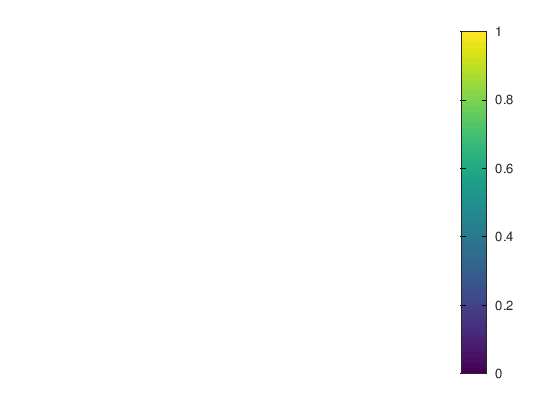

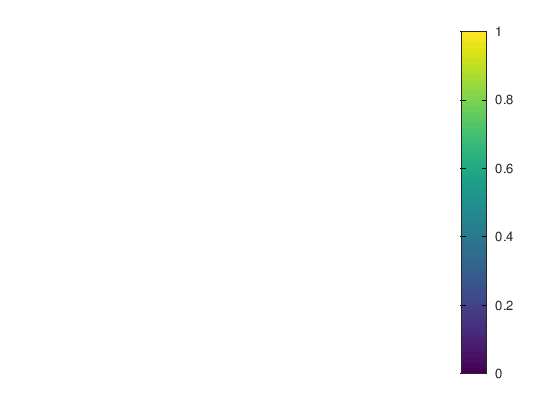

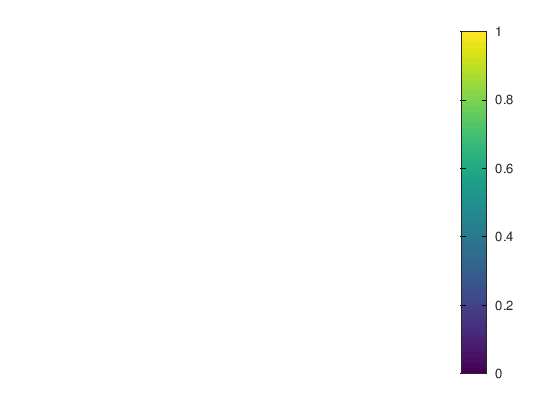

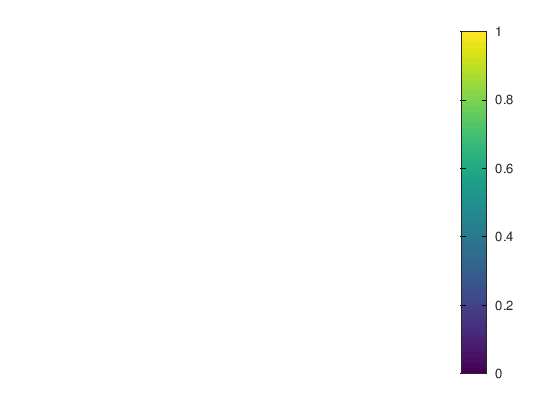

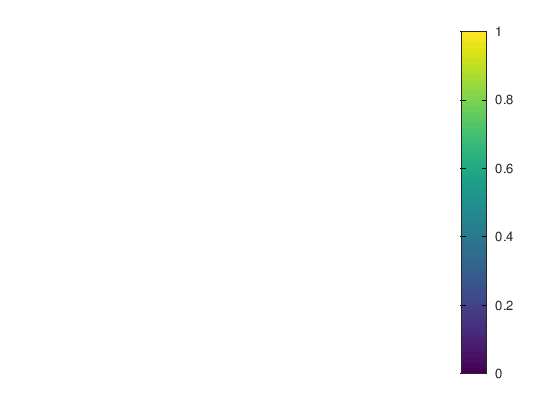

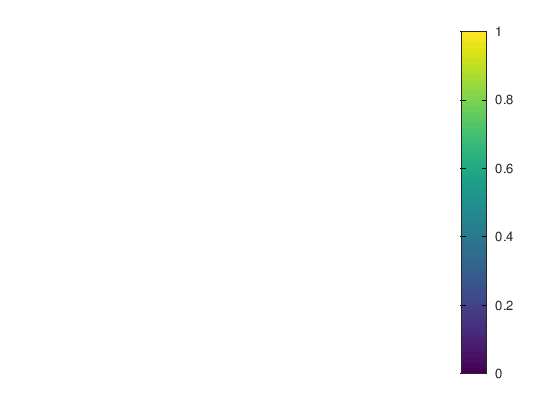

In [4]:

% Energy Tensor
h = figure('Position',figSize1);
toPlot = squeeze(ConstantWarp.energyTensorEulerian.tensor{1,1}(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
surf(X,Y,toPlot,"EdgeAlpha",0)
title("Energy Density")
xlabel('X [m]')
ylabel('Y [m]')
#colormap(h, redblue(toPlot))
set(gcf,'Color','w')
set(gca,'FontSize',textSize)
axis equal
view(2)
colorbar
grid off
box on
xlim([-2 (gridSize(2)+2)]./spaceScale)
ylim([-2 (gridSize(3)+2)]./spaceScale)

figure('Position',figSize6)
energyNames = ["Energy Density", "X Momentum", "Y Momentum", "Z Momentum"; "","X Pressure","X-Y Shear","X-Z Shear"; "","","Y Pressure","Y-Z Shear"; "","","","Z Pressure"];
c1 = [1 1 2 2 3 4];
c2 = [2 3 3 2 3 4];
for i = 1:length(c1)
    h=nexttile;
    toPlot = squeeze(ConstantWarp.energyTensorEulerian.tensor{c1(i),c2(i)}(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
    if c1(i) == 1 && c2(i) ~= 1
        toPlot = -toPlot; % Flip sign for momentum
    end
    surf(X,Y,toPlot,"EdgeAlpha",0)
    title(energyNames(c1(i),c2(i)))
    xlabel('X [m]')
    ylabel('Y [m]')
    #colormap(h, redblue(toPlot))
    set(gcf,'Color','w')
    set(gca,'FontSize',textSize)
    axis equal
    view(2)
    colorbar
    grid off
    box on
    xlim([-2 (gridSize(2)+2)]./spaceScale)
    ylim([-2 (gridSize(3)+2)]./spaceScale)
end


#### Null Energy Condition

Inline plot failed, consider trying another graphics toolkit
           line 0: *All* edges undefined or out of range, thus no plot.

error: print: no axes object in figure to print
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



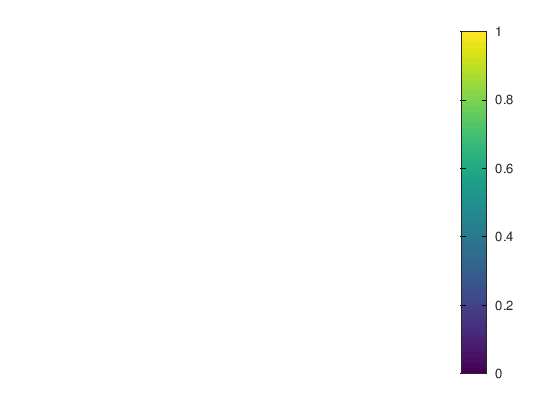

In [5]:

% Energy Conditions
figure('Position',figSize1)
h1 = nexttile;
toPlot = squeeze(ConstantWarp.null(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
surf(X,Y,toPlot,"EdgeAlpha",0)
title("Null")
xlabel('X [m]')
ylabel('Y [m]')
#colormap(h1, redblue(toPlot))
set(gcf,'Color','w')
set(gca,'FontSize',textSize)
axis equal
view(2)
colorbar
grid off
box on
xlim([-2 (gridSize(2)+2)]./spaceScale)
ylim([-2 (gridSize(3)+2)]./spaceScale)


#### Weak Energy Condition

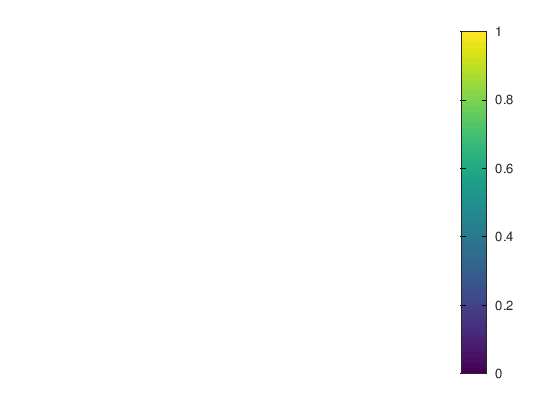

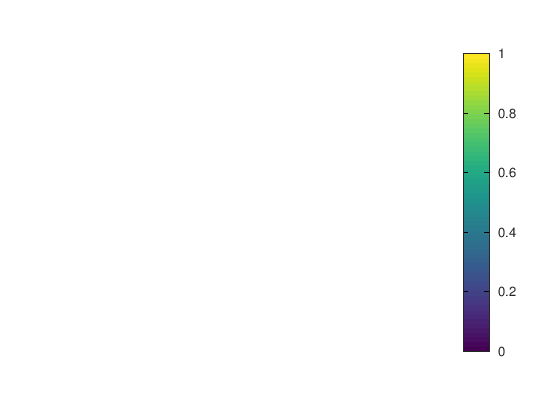

In [6]:

h2 = nexttile;
toPlot = squeeze(ConstantWarp.weak(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
surf(X,Y,toPlot,"EdgeAlpha",0)
title("Weak")
xlabel('X [m]')
ylabel('Y [m]')
#colormap(h2,redblue(toPlot))
set(gcf,'Color','w')
set(gca,'FontSize',textSize)
axis equal
view(2)
colorbar
grid off
box on
xlim([-2 (gridSize(2)+2)]./spaceScale)
ylim([-2 (gridSize(3)+2)]./spaceScale)


#### Strong Energy Condition

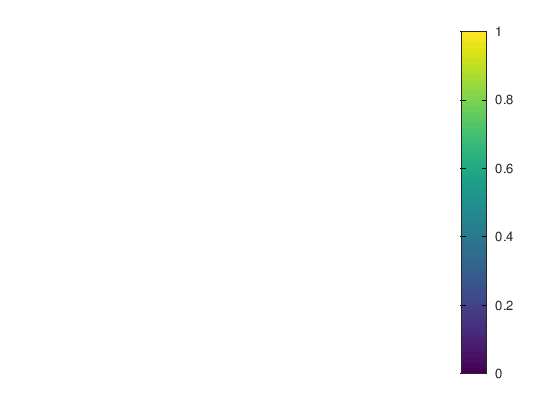

In [7]:

h3 = nexttile;
toPlot = squeeze(ConstantWarp.strong(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
surf(X,Y,toPlot,"EdgeAlpha",0)
title("Strong")
xlabel('X [m]')
ylabel('Y [m]')
#colormap(h3, redblue(toPlot))
set(gcf,'Color','w')
set(gca,'FontSize',textSize)
axis equal
view(2)
colorbar
grid off
box on
xlim([-2 (gridSize(2)+2)]./spaceScale)
ylim([-2 (gridSize(3)+2)]./spaceScale)


#### Dominant Energy Condition

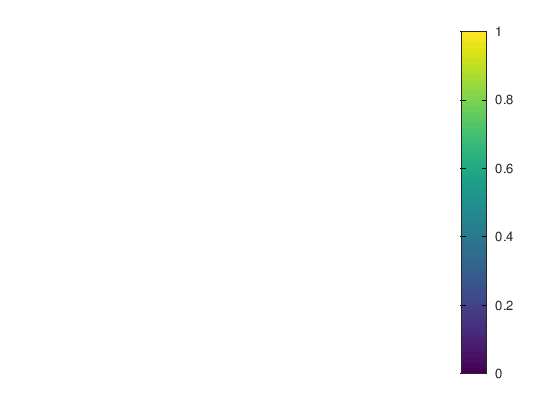

In [8]:
h4 = nexttile;
toPlot = squeeze(ConstantWarp.dominant(1,3:end-2,3:end-2,round((end+1)/2+zOffset)))';
surf(X,Y,toPlot,"EdgeAlpha",0)
title("Dominant")
xlabel('X [m]')
ylabel('Y [m]')
#colormap(h4,redblue(toPlot))
set(gcf,'Color','w')
set(gca,'FontSize',textSize)
axis equal
view(2)
colorbar
grid off
box on
xlim([-2 (gridSize(2)+2)]./spaceScale)
ylim([-2 (gridSize(3)+2)]./spaceScale)
